In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Linear Classificaion and Regression<br><br>

# <span style="color:green">Perceptron Algorithm</span>

### Linear separation Definition：
##### Training examples $s_n=\left \{ x^{(i)}, y^{(i)} , i=1,...,n\right \}$ are linearly seperable if there exists a parameter $\hat{\theta}$ and offset parameter $\hat{\theta_0}$ such that $y^{(i)}(\hat{\theta} \cdot x^{(i)}+\hat{\theta}_0)>0$ for all $i=1,...,n$<br>

### Perceptron Algorithm
<b>Perceptron</b> $\left ( \left \{ (x^{(i)},y^{(i)}),i=1,...,n \right \} ,T\right ):$ <br>
  initialize  $\theta=0 $ (vector), $\theta_0=0$ (scalar) ;<br>
    for  $𝑡=1,...,𝑇$ ,<br>
      for  $𝑖=1,...,𝑛$ ,<br>
        if  $y^{(i)}(\theta \cdot x^{(i)}+\theta_0)\leqslant 0$ ,<Br>
        then update  $\theta=\theta+y^{(i)}\cdot x^{(i)}, \theta_0=\theta_0+y^{(i)} $<br>
  return  $\theta, \theta_0$

In [47]:
def get_order(n_samples):
#     random.seed(1)
    indices = list(range(n_samples))
    random.shuffle(indices)
    return indices
    
def perceptron(feature_matrix, labels, T):
    """
    Runs T iterations through a given set of data, there is no need to worry about stopping early.

    Args:
        feature_matrix - A numpy matrix describing the given data X. 
        labels - A numpy array, correctly classified Y.
        T - An integer indicating how many times the perceptron algorithm should iterate through the feature matrix.

    Returns: A tuple of a numpy array with the value of theta and a real number with the value of theta_0
    """
    theta, theta_0 = np.zeros(feature_matrix.shape[1]), 0
    for t in range(T):
#         for i in get_order(feature_matrix.shape[0]):
        for i in range(feature_matrix.shape[0]):
#         for i in [1,2,3,0,4]:
            if labels[i] * (np.dot(theta.T, feature_matrix[i,:]) + theta_0) <= 0:
                theta += labels[i] * feature_matrix[i,:]
                theta_0 += labels[i]          
    return (theta, theta_0)

### Average Perceptron Algorithm
$\theta_{final}= \frac{1}{nT}(\theta^{(1)}+\theta^{(2)}+...+\theta^{(nT)})$

In [64]:
def average_perceptron(feature_matrix, labels, T):
    """
    Runs T iterations through a given set of data, there is no need to worry about stopping early.

    Args:
        feature_matrix - A numpy matrix describing the given data X. 
        labels - A numpy array, correctly classified Y.
        T - An integer indicating how many times the perceptron algorithm should iterate through the feature matrix.

    Returns: A tuple of a numpy array with the value of theta and a real number with the value of theta_0
    """
    theta, theta_0 = np.zeros(feature_matrix.shape[1]),0
    sum_theta, sum_theta_0 = np.zeros(feature_matrix.shape[1]),0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            if labels[i] * (np.dot(theta.T, feature_matrix[i,:]) + theta_0) <= 0:
                theta += labels[i] * feature_matrix[i,:]
                theta_0 += labels[i]
            sum_theta += theta
            sum_theta_0 += theta_0
    return (sum_theta/T/feature_matrix.shape[0], sum_theta_0/T/feature_matrix.shape[0])

In [67]:
def check_average_perceptron():
    ex_name = "Average perceptron"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 1
    exp_res = (np.array([-0.5, 1]), 1.5)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 2
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 2
    exp_res = (np.array([-0.25, 1.5]), 1.75)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    log(green("PASS"), ex_name, "")
def check_tuple(ex_name, f, exp_res, *args, **kwargs):
    try:
        res = f(*args, **kwargs)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return True
    if not type(res) == tuple:
        log(red("FAIL"), ex_name, ": does not return a tuple, type: ", type(res))
        return True
    if not len(res) == len(exp_res):
        log(red("FAIL"), ex_name, ": expected a tuple of size ", len(exp_res), " but got tuple of size", len(res))
        return True
    if not all(equals(x, y) for x, y in zip(res, exp_res)):
        log(red("FAIL"), ex_name, ": incorrect answer. Expected", exp_res, ", got: ", res)
        return True
def equals(x, y):
    if type(y) == np.ndarray:
        return (x == y).all()
    return x == y
def log(*m):
    print(" ".join(map(str, m)))
def green(s):
    return '\033[1;32m%s\033[m' % s

def yellow(s):
    return '\033[1;33m%s\033[m' % s

def red(s):
    return '\033[1;31m%s\033[m' % s

In [68]:
check_average_perceptron()

PASS Average perceptron 


### Example 1
<b>Proof:</b> $y^{(i)}((\theta+ y^{(i)} x^{(i)}) \cdot x^{(i)}+\theta_0+ y^{(i)})$&nbsp;&nbsp;&nbsp; always&nbsp;&nbsp;&nbsp; $\geqslant y^{(i)}(\theta \cdot x^{(i)}+\theta_0)$ <br><br>
$\because \theta=\theta+y^{(i)}\cdot x^{(i)}$, &nbsp;&nbsp;&nbsp; $ \theta_0=\theta_0+y^{(i)} $ &nbsp;&nbsp;&nbsp;代入&nbsp;&nbsp;&nbsp; $y^{(i)}(\theta \cdot x^{(i)}+\theta_0)$<br>
$ y^{(i)}((\theta+ y^{(i)} x^{(i)}) \cdot x^{(i)}+\theta_0+ y^{(i)})-y^{(i)}(\theta \cdot x^{(i)}+\theta_0)=(y^{(i)})^2\left \| x^{(i)} \right \|^2+(y^{(i)})^2=(y^{(i)})^2(\left \| x^{(i)} \right \|^2+1)>0$<br>
$\therefore $ the first is always greater than the latter. Considering that our goal is to minimize the training error, the update always makes the training error decrease, which is desirable.

<br><br>
# <span style="color:green">Margin Boundary</span>

### Example 1 Distance from a Line to a Point
Let the point  𝑃  be the endpoint of a vector  $x_0$  (so the coordinates of  𝑃  equal the components of  $x_0$ ). What is the the shortest distance  𝑑  between the line  𝐿  and the point  𝑃 ? <br>
<img width="200" src="https://feiyiwang.github.io/notebook/jupyter/img/images_lec3_distancelinepoint.svg"><Br>
<b>Solution:</b> If there is no offset  $\theta_0$ , The distance  𝑑  is the projection from  $x_0$  to  𝜃 , which is  $\frac{ \left | x_0 \cdot \theta \right | }{ \left \| \theta \right \|}$ (definition of projection). Thus, with the offset  $\theta_0$  added,  𝑑  is  $\frac{ \left | x_0 \cdot \theta + \theta_0 \right | }{ \left \| \theta \right \|} $.  

In other words, in a 2 dimensional space, a line  𝐿  is given by  𝐿:𝑎𝑥+𝑏𝑦+𝑐=0 , and a point  𝑃  is given by  𝑃=(𝑥0,𝑦0) .  The shortest distance between  𝐿  and  𝑃 is $\frac{a \cdot x_0+b \cdot y_0+c}{\sqrt{a^2+b^2}}$

The <font color='blue'>decision boundary</font> is the set of points  𝑥  which satisfy $\theta \cdot x+\theta_0=0$ <br>
The <font color='blue'>Margin Boundary</font> is the set of points  𝑥  which satisfy $\theta \cdot x+\theta_0= \pm 1$<br>
$\therefore$ the distance <font color='blue'>d</font> from the decision boundary to the margin boundary is  $\frac{ 1 }{ \left \| \theta \right \|} $ .

<br><br>
# <span style="color:green">Hinge Loss, Regularization and Objective Function</span>

Our regularization goal is to maximize the distance &nbsp;&nbsp;&nbsp; $\gamma(\theta,\theta_0)=\frac{y^{(i)}(\theta \cdot x^{(i)}+ \theta_0)}{\left \| \theta \right \|}=\frac{1}{\left \| \theta \right \|}$<br>
<img width="400" src="img/3.1.png"><img width="400" src="img/3.2.png">

1. <b>Hinge Loss:</b> $Loss_h(z)=\begin{cases} 0 & \text{ if } z \geqslant 1 \\ 1-z & \text{ if } z<1 \end{cases}$  where  $z = y^{(i)}(\theta \cdot x^{(i)}+ \theta_0)$

2. <b>Regularization:</b> towards max margin <br>
max = $\frac{ 1 }{ \left \| \theta \right \|} $ &nbsp;&nbsp;&nbsp; min = $\frac{ 1 }{2}\left \| \theta \right \|^2 $

3. <b>Objective:</b> $J(\theta,\theta_0)={\color{red} {\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}Loss_h(\theta \cdot x^{(i)}+ \theta_0))}}+{\color{blue} {\frac{\lambda}{2}\left \| \theta \right \|^2}}$<br>
<span style="color:red">Loss:</span> Each hinge loss measures how much that example violates the defined margin boundary.<br>
<span style="color:blue">Reg:</span> Reg term tries to push the margin boundary further and further<br>

$\lambda$ is regularization parameter. <BR>
- Large $\lambda$ - prefer large margin solution but potentially at a cost of incurring some further loss as margin boundary push past the examples
- Small $\lambda$ - in favor of accurately putting our examples outside the margin boundary at a cost of keeping the margin boundary closer to the decision boundary<br>
<img width='400' src='img/4.1.png'><img width='400' src='img/4.2.png'><img width='400' src='img/4.3.png'>

### Summary
1. <b>General optimization formulation of learning</b> &nbsp;&nbsp;&nbsp; objective function = average loss + regularization
2. <b>Large margin linear classification as optimization</b> &nbsp;&nbsp;&nbsp; margin boundaries, hinge loss, regularization<br>
$J(\theta, \theta_0)=\frac{1}{n}\sum_{i=1}^{n}Loss_n(y^{(i)}(\theta \cdot x^{(i)}+\theta_0))+\frac{\lambda}{2}\left \| \theta \right \|^2$<br><br>
Loss / error<br>
simple<img width='500' src='img/var_bias.png'>complex

If the training loss is low and the validation loss is high, the model might be overfitting.<br>
If the training loss is high and the validation loss is low, the model might be underfitting.

In [ ]:
def hinge_loss(feature_matrix, labels, theta, theta_0):
    """
    Finds the total hinge loss on a set of data given specific classification parameters.

    Args:
        feature_matrix - A numpy matrix describing the given data X. 
        labels - A numpy array, correctly classified Y.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    Returns: A real number representing the average hinge loss across all of the points in the feature matrix.
    """
    y_vector = np.dot(feature_matrix, theta.T) + theta_0
    loss = np.maximum(np.zeros(len(labels)), 1-y_vector*labels)
    return np.mean(loss)

<br><br>
# <span style="color:green">Pegasos Algorithm</span>

<b>Pegasos update rule</b> ($x^{(i)}$, $y^{(i)}$, 𝜆, 𝜂, 𝜃): <br>
if  $y^{(i)}$(𝜃⋅$x^{(i)}$) ≤ 1  then<br>
  update  𝜃 = (1 − 𝜂𝜆) 𝜃 + 𝜂$y^{(i)}x^{(i)}$  
else: <br>
  update  𝜃 = (1 − 𝜂𝜆) 𝜃  

The  𝜂  parameter is a decaying factor that will decrease over time. The  𝜆  parameter is a regularizing parameter.

In [63]:
def pegasos(feature_matrix, labels, T, L):
    """
    Runs T iterations through a given set of data, there is no need to worry about stopping early.

    For each update, set learning rate = 1/sqrt(t), where t is a counter for the number of updates 
    performed so far (between 1 and nT inclusive).

    Args:
        feature_matrix - A numpy matrix describing the given data X. 
        labels - A numpy array, correctly classified Y.
        T - An integer indicating how many times the algorithm should iterate through the feature matrix.
        L - The lamba value being used to update the Pegasos algorithm parameters.

    Returns: A tuple of a numpy array with the value of theta and a real number with the value of theta_0
    """
    theta, theta_0 = np.zeros(feature_matrix.shape[1]), 0
    count = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            count += 1
            eta = 1.0/np.sqrt(count)
            
            y = np.dot(feature_matrix[i], theta.T) + theta_0
            if labels[i] * y <= 1:
                theta = (1 - eta*L)*theta + eta*labels[i]*feature_matrix[i]
                theta_0 += eta * labels[i]
            else:
                theta = (1 - eta*L)*theta
    return (theta, theta_0)

<br><br>
# <span style="color:green">Optimization Algorithm</span>

Our goal is to maximize the distance &nbsp;&nbsp;&nbsp; $\gamma(\theta,\theta_0)=\frac{y^{(i)}(\theta \cdot x^{(i)}+ \theta_0)}{\left \| \theta \right \|}=\frac{1}{\left \| \theta \right \|}$ <br>and minimize the cost function &nbsp;&nbsp;&nbsp; $J(\theta, \theta_0)=\frac{1}{n}\sum_{i=1}^{n}Loss_n(y^{(i)}(\theta \cdot x^{(i)}+\theta_0))+\frac{\lambda}{2}\left \| \theta \right \|^2$ &nbsp;&nbsp;&nbsp; through gradient descent. So we will<br>
 1. Start  𝜃  at an arbitrary location:  𝜃←𝜃𝑠𝑡𝑎𝑟𝑡 
 2. Update  𝜃  repeatedly with  $\theta = \theta - \eta \frac{\partial J(\theta, \theta_0)}{\partial\theta}$  until  𝜃  does not change significantly


<img width="200" src="https://feiyiwang.github.io/notebook/jupyter/img/images_lec4_pic3.svg">

### Stochastic Gradient Descent (SGD)

$J(\theta, \theta_0)=\frac{1}{n}\sum_{i=1}^{n}Loss_n(y^{(i)}(\theta \cdot x^{(i)}+\theta_0))+\frac{\lambda}{2}\left \| \theta \right \|^2=\frac{1}{n} \left [ \sum_{i=1}^{n}Loss_n(y^{(i)}(\theta \cdot x^{(i)}+\theta_0))+\frac{\lambda}{2}\left \| \theta \right \|^2\right ] $

Simplify&nbsp;  $=\frac{1}{n} \left [ \sum_{i=1}^{n}Loss_n(y^{(i)}\theta \cdot x^{(i)})+\frac{\lambda}{2}\left \| \theta \right \|^2\right ] $<br>
Select $i \in \left \{ 1,...,n \right \}$ at random<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\theta\leftarrow\theta-\eta_t\nabla_\theta\left [ Loss_h\left ( y^{(i)}\theta\cdot x^{(i)}  \right )+\frac{\lambda}{2}\left \| \theta \right \|^2 \right ]$

### Quadratic Program - Support Vector Machine
- Support Vector Machine finds the maximum margin linear separator by solving the quadratic program that corresponds to $J(\theta, \theta_0)$
- In the realizable case, if we disallow any margin violations, the quadratic program we have to solve is<br>
Find $\theta, \theta_0$ that minimize $\frac{1}{2}\left \| \theta \right \|^2$ subject to $y^{(i)}(\theta \cdot x^{(i)} +\theta_0)\geqslant 1$ where $i = 1,...,n$

### Summary
1. Learning problems can be formulated as optimization problems of the form: loss + regularization
2. Linear, large margin classification, along with many other learning problems, can be solved with stochastic gradient descent algorithms
3. Large margin linear classifier can be also obtained via solving a quadratic program (Support Vector Machine)

<br><br>
# <font color='green'>Kernel</font>

Computing the inner product between two feature vectors can be cheap even if the vectors are very high dimensional.
This type of dot function of two feature vectors/examples is a kernel function.

### Example 1

Assume we map $x$  and  $x'∈ℝ^2$  to feature vectors  𝜙(𝑥)  and  𝜙(𝑥′)  given by <br>
$\phi(x)=[{\color{red} {x_1,x_2}},{\color{blue} {{x_1}^2,\sqrt{2}x_1x_2,{x_2}^2}}]$<br>
$\phi(x')=[{\color{red} {x_1',x_2'}},{\color{blue} {{x_1'}^2,\sqrt{2}x_1'x_2',{x_2'}^2}}]$<br>
$\therefore$ &nbsp;&nbsp;&nbsp; a kernel &nbsp;&nbsp;&nbsp;   $K\left \langle x,x' \right \rangle=\phi(x) \cdot \phi(x')={\color{red} {(x\cdot x')}}+{\color{blue} {(x\cdot x')^2}}$<br>

### Example 2

If&nbsp;&nbsp;&nbsp;  $K\left \langle x,x' \right \rangle=\phi(x)\cdot\phi(x')={\color{red} {x_1x_1'}}+{\color{blue} {x_2x_2'+x_2x_3'+x_3x_2'+x_3x_3'}}$<br>
then &nbsp;&nbsp;&nbsp; $\phi(x)=[{\color{red} {x_1}},{\color{blue} {x_2+x_3}}]$ &nbsp;&nbsp;&nbsp; $\phi(x')=[{\color{red} {x_1'}},{\color{blue} {x_2'+x_3'}}]$

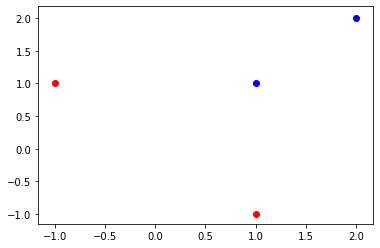

In [7]:
plt.scatter(-1, 1, c='red')
plt.scatter(1, -1, c='red')
plt.scatter(1, 1, c='blue')
plt.scatter(2, 2, c='blue')

Gaussian RBF Kernel:  $K\left \langle x,x' \right \rangle = e^{-\frac{1}{2\sigma}\left \| x-x' \right \|^2}$

In [74]:
labels, xs, ys = np.loadtxt('toy_data.tsv', delimiter='\t', unpack=True)
X, Y = np.vstack((xs, ys)).T, labels

In [78]:
T = 100
L = 0.2

thetas_perceptron = perceptron(X, Y, T)
thetas_avg_perceptron = average_perceptron(X, Y, T)
thetas_pegasos = pegasos(X, Y, T, L)

In [84]:
def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses theta and theta_0 to classify a set of data points.

    Returns: A numpy array of 1s and -1s.
    """
    y = np.dot(feature_matrix, theta.T) + theta_0
    return np.array([1 if i > 1e-7 else -1 for i in y])

def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()

In [87]:
def plot_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    pred = classify(X, thetas[0], thetas[1])
    accuracy_ = accuracy(pred, Y)
    print('accuracy for', algo_name, 'is', str(accuracy_))
    
    def plot_toy_data(algo_name, features, labels, thetas):
        """
        Plots the toy data in 2D.
        Arguments:
        * features - an Nx2 ndarray of features (points)
        * labels - a length-N vector of +1/-1 labels
        * thetas - the tuple (theta, theta_0) that is the output of the learning algorithm
        * algorithm - the string name of the learning algorithm used
        """
        # plot the points with labels represented as colors
        plt.subplots()
        colors = ['b' if label == 1 else 'r' for label in labels]
        plt.scatter(features[:, 0], features[:, 1], s=40, c=colors)
        xmin, xmax = plt.axis()[:2]

        # plot the decision boundary
        theta, theta_0 = thetas
        xs = np.linspace(xmin, xmax)
        ys = -(theta[0]*xs + theta_0) / (theta[1] + 1e-16)
        plt.plot(xs, ys, 'k-')

        # show the plot
        algo_name = ' '.join((word.capitalize() for word in algo_name.split(' ')))
        plt.suptitle('Classified Toy Data ({})'.format(algo_name))
        plt.show()
        
    plot_toy_data(algo_name, X, Y, thetas)

theta for Perceptron is 4.176099999999991, 2.257399999999976
theta_0 for Perceptron is -1.0
accuracy for Perceptron is 0.785


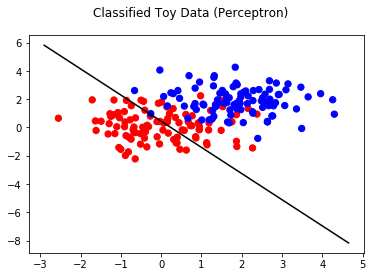

theta for Average Perceptron is 2.5869705349999608, 2.789286550000017
theta_0 for Average Perceptron is -4.99255
accuracy for Average Perceptron is 0.915


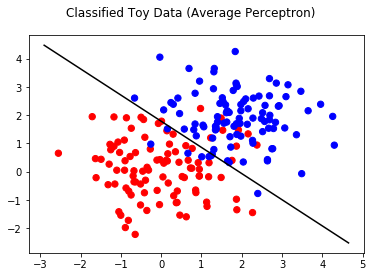

theta for Pegasos is 0.6353739128078978, 0.6476111025126345
theta_0 for Pegasos is -1.1986024478548203
accuracy for Pegasos is 0.92


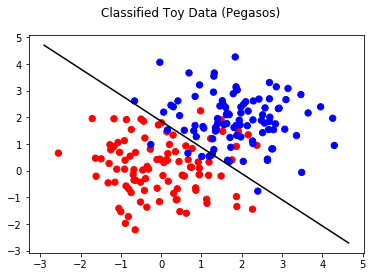

In [88]:
plot_results('Perceptron', thetas_perceptron)
plot_results('Average Perceptron', thetas_avg_perceptron)
plot_results('Pegasos', thetas_pegasos)